<a href="https://colab.research.google.com/github/Cristian95R/Dataset_Demanda_EnergeticaAR/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

La demanda de energía es un factor crítico en la formulación de políticas públicas y estrategias empresariales, especialmente para las entidades que gestionan el suministro de electricidad. Comprender y analizar el consumo energético de distintas poblaciones o regiones se vuelve fundamental para asegurar un abastecimiento adecuado y sostenible.

Este estudio se centra en evaluar las demandas energéticas de varios agentes dentro de una geografía determinada, considerando factores como las variaciones temporales, las categorías de consumo, la temperatura y las diferencias regionales.

El objetivo es proporcionar un análisis detallado del comportamiento de la demanda energética, identificando patrones de consumo y prediciendo las necesidades futuras. Esto permitirá a las autoridades y empresas del sector planificar y ejecutar diversas politicas públicas u obras de infraestructura energética que respondan de manera eficiente y efectiva a las necesidades del conjunto de los habitantes, promoviendo así un desarrollo sostenible y una gestión energética óptima.

**Preguntas Clave:**


1.   ¿Cuál es la tendencia de la demanda eléctrica a lo largo del tiempo?
2.   ¿Cómo varía la demanda eléctrica entre diferentes provincias?
3.   ¿Existen diferencias significativas en la demanda eléctrica entre distintas categorías de área o de tarifa?
4.   ¿Cuáles son los meses con mayor y menor demanda eléctrica?
5.   ¿Cómo ha evolucionado la demanda eléctrica a lo largo de los años en una provincia específica?
6.  ¿Hay patrones estacionales en la demanda de energía que se correlacionan con cambios estacionales en el clima?(Análisis estacional de la demanda)
7.   ¿Pueden los datos climáticos mejorar las predicciones de la demanda eléctrica a corto y largo plazo? (Predicción de la demanda)

8.   ¿Cómo varía la influencia del clima en la demanda eléctrica entre diferentes regiones o provincias? (Impacto del clima por región)










In [1]:
#Importacion de Librerias
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import locale
# Configuración para que matplotlib muestre los gráficos en Colab
%matplotlib inline

Se realiza la carga de los datasets que estan alojados en el drive para el analisis que se quiere desarrollar.

Se utilizan los siguientes datasets:
De la pagina de CAMMESA (Compañía Administradora del Mercado Mayorista Eléctrico S.A.) se descargo el dataset de Demanda Mensual.xlsx
De la pagina del Servicio Meteorológico Nacional Argentino se descargo un archivo de texto que posee el registro de temperaturas del país.
Adicionalmente se creó un registro de localidades y provincias con el nombre de Provincias_Temp.xlsx





In [2]:
#Carga de Datasets
from google.colab import drive
drive.mount('/content/drive')
df_Demanda = pd.read_excel("/content/drive/MyDrive/Data Science/Ejercicio Final Coder House/Demanda Mensual.xlsx")

file_path = "/content/drive/MyDrive/Data Science/Ejercicio Final Coder House/Temperatura.txt"
# Leer el archivo como un conjunto de líneas para manejar manualmente las irregularidades
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

# Saltar las primeras tres líneas y procesar las siguientes
processed_data = []
for line in lines[3:]:
    fecha = line[:8].strip()
    tmax = line[9:14].strip()
    tmin = line[15:20].strip()
    nombre = line[20:].strip()
    processed_data.append([fecha, tmax, tmin, nombre])

Mounted at /content/drive


# **Análisis de Exploracion de Datos (EDA)**
En esta seccion se detalla los datasets utilizados en el analisis

**-Demanda Mensual.xlsx**:

El dataset contiene 43,129 registros en 12 columnas.
El archivo no posee nulos en ninguno de sus campos
EL resumen de su estructura es el siguiente:

*   AÑO: Año de la demanda (tipo int64).
*   MES: Contiene la fecha entera de la demanda en formato AAAAMMDD (tipo datetime64).
*   AGENTE NEMO: Identificador/Código del agente (tipo object).
*   AGENTE DESCRIPCION: Descripción del agente (tipo object).
*   TIPO AGENTE: Tipo de agente (GU, probablemente se refiera a 'Gran Usuario' u otro tipo específico) (tipo object).
*   REGION: Región geográfica (tipo object).
*   PROVINCIA: Provincia (tipo object).
*   CATEGORIA AREA: Categoría del área, como 'Gran Usuario MEM' (tipo object).
*   CATEGORIA DEMANDA: Categoría de la demanda, como 'Gran Usuario' (tipo object).
*   TARIFA: Tipo de tarifa aplicada (tipo object).
*   CATEGORIA TARIFA: Categoría de la tarifa, por ejemplo, 'Industrial/Comercial Grande' (tipo object).
*   DEMANDA [MWh]: Demanda eléctrica en MWh (tipo float64).

In [148]:
df_Demanda.head ()

,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2020,2020-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1699.777
1,2020,2020-01-01,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1423.579
2,2020,2020-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,513.050
3,2020,2020-01-01,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,607.925
4,2020,2020-01-01,ACERBR1Y,ACERBRAG-Bragado,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,19975.415


**Temp.txt:**
El dataset contiene 46,587 registros en 4 columnas.
EL resumen de su estructura es el siguiente:

*   FECHA: Representa la fecha de la observación. Es de tipo objeto (string) y tiene 46,587 valores no nulos, lo que indica que no hay fechas faltantes en el conjunto de datos. El formato inicial de la fecha es DDMMAAAA
*   TMAX: Corresponde a la temperatura máxima registrada para la fecha y ubicación dadas. Es de tipo flotante y tiene 44,062 valores no nulos, lo que sugiere que hay 1,525 registros sin temperatura máxima.
*   TMIN: Corresponde a la temperatura mínima registrada para la fecha y ubicación dadas. Es de tipo flotante y tiene 45,024 valores no nulos, indicando que hay 1,563 registros sin temperatura mínima.
*   NOMBRE: Indica el nombre de la ubicación donde se realizó la observación. Es de tipo objeto (string) y todos los registros tienen una ubicación asociada. Las ubicaciones corresponden a nombres de locaciones especificas.




In [3]:
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()
    # Saltar las primeras tres líneas y procesar las siguientes
processed_data = []
for line in lines[3:]:
    fecha = line[:8].strip()
    tmax = line[9:14].strip()
    tmin = line[15:20].strip()
    nombre = line[20:].strip()
    processed_data.append([fecha, tmax, tmin, nombre])
# Convertir los datos procesados a un DataFrame de pandas
Temp_df = pd.DataFrame(processed_data, columns=['FECHA', 'TMAX', 'TMIN', 'NOMBRE'])
Temp_df.head()

,FECHA,TMAX,TMIN,NOMBRE
0,31122023,26.0,21.1,AEROPARQUE AERO
1,31122023,26.2,15.3,AZUL AERO
2,31122023,32.3,20.3,BAHIA BLANCA AERO
3,31122023,26.9,11.6,BARILOCHE AERO
4,31122023,4.0,-5.7,BASE BELGRANO II


**Provincias_Temp Diccionario:**
Se crea un diccionario que contiene 121 registros en 2 columnas. Contiene todas los nombres de las localidades del dataset Temp.txt. Relaciona estas localidades con sus respectivas provincias.
El resumen de su estructura es el siguiente:
*   LOCALIDAD: Indica el nombre de la ubicación donde se realizó la observación meteorológica.

*   PROVINCIA: Representa la provincia correspondiente a cada una de las localidades.

In [26]:
Provincias_Temp = {
    "Buenos Aires": ['AEROPARQUE AERO',
 'AZUL AERO',
 'BAHIA BLANCA AERO',
 'BENITO JUAREZ AERO',
 'BOLIVAR AERO',
 'BUENOS AIRES OBSERVATORIO',
 'CAMPO DE MAYO AERO',
 'CORONEL SUAREZ AERO',
 'EL PALOMAR AERO',
 'EZEIZA AERO',
 'ITUZAINGO',
 'JUNIN AERO',
 'LA PLATA AERO',
 'LAS FLORES',
 'MAR DEL PLATA AERO',
 'MARIANO MORENO AERO',
 'MORON AERO',
 'NUEVE DE JULIO',
 'OLAVARRIA AERO',
 'PEHUAJO AERO',
 'PIGUE AERO',
 'PILAR OBSERVATORIO',
 'TANDIL AERO',
 'TRENQUE LAUQUEN',
 'TRES ARROYOS',
 'VILLA DOLORES AERO',
 'VILLA GESELL AERO',
 'PUNTA INDIO B.A.',
 'CORONEL PRINGLES AERO',
 'DOLORES AERO'],

    "Rio Negro": [
        'BARILOCHE AERO',
 'CIPOLLETTI',
 'EL BOLSON AERO',
 'MAQUINCHAO',
 'SAN ANTONIO OESTE AERO',
 'VIEDMA AERO'],

    "Antartida":
    ['BASE BELGRANO II',
 'BASE CARLINI (EX JUBANY)',
 'BASE ESPERANZA',
 'BASE MARAMBIO',
 'BASE ORCADAS',
 'BASE SAN MARTIN'],

  "Jujuy":['JUJUY AERO', 'JUJUY U N', 'LA QUIACA OBSERVATORIO'],

  "Salta": ['METAN', 'ORAN AERO', 'SALTA AERO', 'SAN JULIAN AERO', 'TARTAGAL AERO'],

  "Catamarca":['CATAMARCA AERO', 'TINOGASTA'],

  "Tucuman": ['TUCUMAN AERO'],

  "Santiago del Estero": ['RIVADAVIA', 'SANTIAGO DEL ESTERO AERO', 'TERMAS DE RIO HONDO AERO'],

  "Chaco": ['PRESIDENCIA ROQUE SAENZ PEÑA AERO', 'RESISTENCIA AERO'],

  "Formosa": ['FORMOSA AERO', 'LAS LOMITAS'],

  "Cordoba": ['CORDOBA AERO',
 'CORDOBA OBSERVATORIO',
 'LABOULAYE AERO',
 'MARCOS JUAREZ AERO',
 'RIO CUARTO AERO',
 'VILLA DE MARIA DEL RIO SECO',
 'ESCUELA DE AVIACION MILITAR AERO'],

  "La Rioja": ['CHEPES', 'CHILECITO AERO', 'LA RIOJA AERO', 'CHAMICAL AERO'],

  "San Juan": ['JACHAL', 'SAN JUAN AERO'],

  "San Luis": ['MERLO AERO',
 'SAN LUIS AERO',
 'VILLA REYNOLDS AERO',
 'SANTA ROSA DE CONLARA AERO'],

  "Mendoza": ['MALARGUE AERO',
 'MENDOZA AERO',
 'MENDOZA OBSERVATORIO',
 'SAN MARTIN (MZA)',
 'USPALLATA'],

  "Chubut": ['COMODORO RIVADAVIA AERO', 'ESQUEL AERO', 'PASO DE INDIOS', 'TRELEW AERO'],

  "Santa Cruz": ['EL CALAFATE AERO',
 'GOBERNADOR GREGORES AERO',
 'PUERTO DESEADO AERO',
 'PUERTO MADRYN AERO',
 'RIO GALLEGOS AERO',
 'SANTA CRUZ AERO',
 'PERITO MORENO AERO'],

  "Tierra del Fuego": ['RIO GRANDE B.A.', 'USHUAIA AERO'],

  "Santa Fe": ['CERES AERO',
 'RAFAELA AERO',
 'RECONQUISTA AERO',
 'ROSARIO AERO',
 'SAN RAFAEL AERO',
 'SAUCE VIEJO AERO',
 'SUNCHALES AERO',
 'VENADO TUERTO AERO'],

  "Entre Rios":  ['CONCORDIA AERO', 'GUALEGUAYCHU AERO', 'PARANA AERO'],

  "La Pampa": ['GENERAL PICO AERO', 'SANTA ROSA AERO', 'VICTORICA'],

  "Corrientes": ['CORRIENTES AERO',
 'MERCEDES AERO (CTES)',
 'MONTE CASEROS AERO',
 'PASO DE LOS LIBRES AERO',
 'OBERA'],

  "Misiones": ['BERNARDO DE IRIGOYEN AERO', 'IGUAZU AERO', 'POSADAS AERO'],
}

Creo un dataset a partir del diccionario

In [28]:
# Convertir el diccionario en una lista de tuplas (provincia, localidad)
datos_flatten = [(provincia, localidad) for provincia, localidades in Provincias_Temp.items() for localidad in localidades]

# Crear un DataFrame a partir de la lista de tuplas
DF_prov_temp = pd.DataFrame(datos_flatten, columns=['PROVINCIA', 'LOCALIDAD'])

# **Feature Engineer o Ingenieria de Caracteristicas**

Usando el conocimiento del objetivo que se busca alcanzar en esta parte se procedera a seleccionar, modificar o crear nuevas características (variables) a partir de los datos crudos, con el fin de hacer los modelos de machine learning más eficaces. Este proceso es crucial porque la calidad y relevancia de las características utilizadas pueden tener un impacto significativo en la capacidad del modelo para aprender y realizar predicciones o clasificaciones.

Los Pasos que se realizaran son los siguientes:



*  *Seleccion de Caracteristicas:* Se identificaran las variables que necesito para el modelo y se eliminaran las variables que no aporten informacion relevante.
* *Transformación de características:* Se aplicaran sobre algunas variables transformaciones para mejorar la relacion o distribucion con la variable a analizar(Variable Target)
*   *Creación de características:* Desarrolla nuevas variables a partir de las existentes combinandolas o modificandolas para mejorar el analisis.
*   *Manejo de valores faltantes*





Con el Dataset de **Demanda Mensual.xlsx(DM)** se procede a realizar una Seleccion de Caracteristicas. Las variables no necesarias para el modelo son Agente Nemo, Tipo Agente y Categoria Demanda; Todas ellas pertenecen a nomenclaturas internas propias de la empresa que genera el dataset, por lo que no aportan ningún valor a nuestro analisis.

Tambien se realiza una Creacion de Caracteristicas a la variable MES la misma tiene dentro de si el año, el mes y el dia expresado de la siguiente forma AAAA-MM-DD por lo que se procede a que en la columna mes solo quede el numero del mes correspondiente. Ademas se crean dos nuevas columnas una para el número del dia y otra para el nombre del dia.

Una vez arreglado el dataset se procedera a realizar mediciones individuales para evaluar las tendencias del mismo


In [5]:
# Cambiar la columna 'MES' para que contenga solo el número del mes
df_Demanda['NUMERO_MES'] = df_Demanda['MES'].dt.month  # Crear una nueva columna para el número del mes para evitar confusión

# Renombrar la columna 'MES' a 'FECHA' para evitar confusiones y usar 'NUMERO_MES' como la columna del mes
df_Demanda.rename(columns={'MES': 'FECHA'}, inplace=True)
df_Demanda.rename(columns={'NUMERO_MES': 'MES'}, inplace=True)

# Eliminar la columna 'FECHA' y 'AGENTE NEMO'
df_Demanda = df_Demanda.drop(columns=['FECHA', 'AGENTE NEMO', 'TIPO AGENTE', 'CATEGORIA DEMANDA'])

# Reordenar las columnas para que 'AÑO', 'MES' y 'DIA' estén juntos al principio
column_order = ['AÑO', 'MES'] + [col for col in df_Demanda.columns if col not in ['AÑO', 'MES']]
df_Demanda = df_Demanda[column_order]

# Verificar el resultado final
df_Demanda.head()

,AÑO,MES,AGENTE DESCRIPCION,REGION,PROVINCIA,CATEGORIA AREA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2020,1,AEROP ARG 2000 - Aeroparque,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1699.777
1,2020,1,ABRIL CLUB DE CAMPO,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1423.579
2,2020,1,ASOC.COOP.ARG. - Quequén,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,513.050
3,2020,1,ASOC.COOP.ARG. - San Lorenzo,LITORAL,SANTA FE,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,607.925
4,2020,1,ACERBRAG-Bragado,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,19975.415


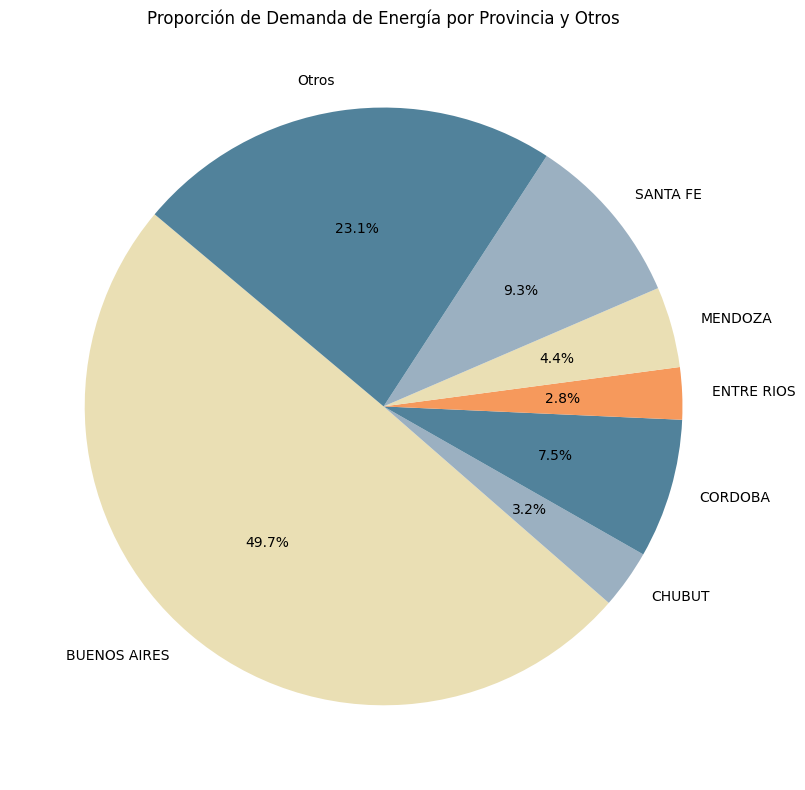

In [6]:
# Calcular la demanda total de energía por provincia nuevamente
demanda_total_por_provincia = df_Demanda.groupby('PROVINCIA')['DEMANDA [MWh]'].sum()

# Calcular el total de demanda de energía para determinar el porcentaje
total_demanda = demanda_total_por_provincia.sum()

# Encontrar provincias con menos del 3% de la demanda total y agruparlas en la categoría "Otros"
otros = demanda_total_por_provincia[demanda_total_por_provincia / total_demanda < 0.025].sum()
demanda_agrupada = demanda_total_por_provincia[demanda_total_por_provincia / total_demanda >= 0.025]
demanda_agrupada['Otros'] = otros

# Definir la gama de colores para el gráfico
colores = ['#EADFB4', '#9BB0C1', '#51829B', '#F6995C']

# Crear el gráfico de torta con la gama de colores especificada
plt.figure(figsize=(10, 8))
plt.pie(demanda_agrupada, labels=demanda_agrupada.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Proporción de Demanda de Energía por Provincia y Otros')
plt.tight_layout()
plt.show()

<ipython-input-7-f168e139bca7>:28: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=demanda_por_mes_y_region, x='AÑO_MES', y='DEMANDA [MWh]', hue='REGION2', palette=colores_regiones, marker="o")


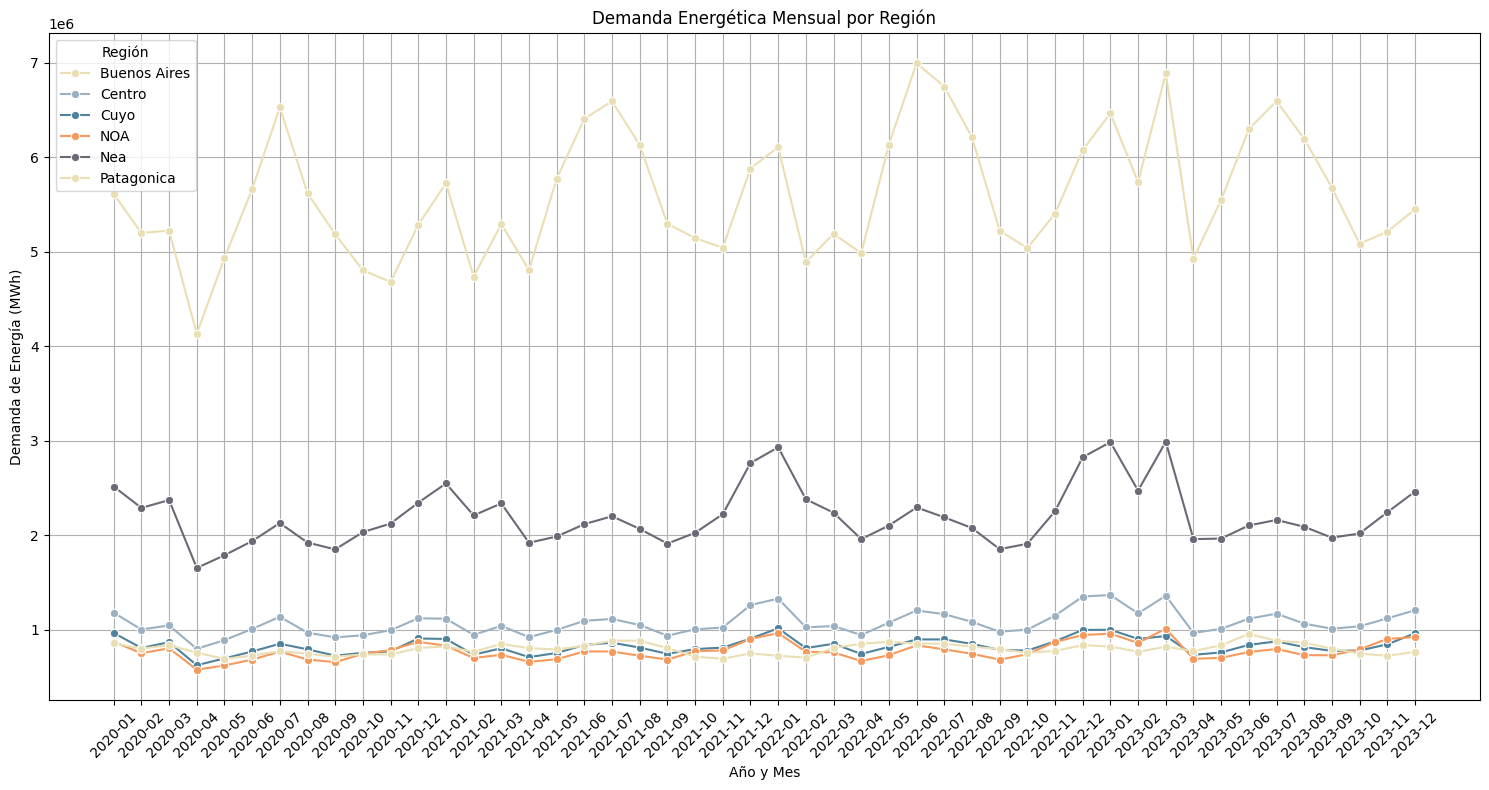

In [7]:
# Mapeo de provincias a regiones para ver la tendencias de las regiones
regiones = {
    'Nea': ['CHACO', 'MISIONES', 'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'SANTA FE'],
    'Centro': ['LA PAMPA', 'CORDOBA', 'SGO.DEL ESTERO'],
    'Cuyo': ['MENDOZA', 'SAN LUIS', 'SAN JUAN'],
    'NOA': ['SALTA', 'JUJUY', 'TUCUMAN', 'CATAMARCA', 'LA RIOJA'],
    'Patagonica': ['NEUQUEN', 'RIO NEGRO', 'CHUBUT', 'SANTA CRUZ'],
    'Buenos Aires': ['BUENOS AIRES']
}

# Crear un diccionario inverso para mapear cada provincia a su región
provincia_region = {provincia: region for region, provincias in regiones.items() for provincia in provincias}

# Asignar la región a cada fila en el DataFrame
df_Demanda['REGION2'] = df_Demanda['PROVINCIA'].map(provincia_region)

# Combinar las columnas de 'AÑO' y 'MES' en una sola para el agrupamiento
df_Demanda['AÑO_MES'] = df_Demanda['AÑO'].astype(str) + '-' + df_Demanda['MES'].astype(str).str.zfill(2)

# Agrupar los datos por 'AÑO_MES' y 'REGION' para sumar la demanda de energía
demanda_por_mes_y_region = df_Demanda.groupby(['AÑO_MES', 'REGION2'])['DEMANDA [MWh]'].sum().reset_index()

# Definir la paleta de colores
colores_regiones = ['#EADFB4', '#9BB0C1', '#51829B', '#F6995C', '#6D6875']

# Crear el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=demanda_por_mes_y_region, x='AÑO_MES', y='DEMANDA [MWh]', hue='REGION2', palette=colores_regiones, marker="o")

plt.xticks(rotation=45)
plt.title('Demanda Energética Mensual por Región')
plt.xlabel('Año y Mes')
plt.ylabel('Demanda de Energía (MWh)')
plt.legend(title='Región')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-8-18d8f6d6c90e>:9: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=demanda_promedio_por_mes_y_region, x='MES', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones , marker="o")


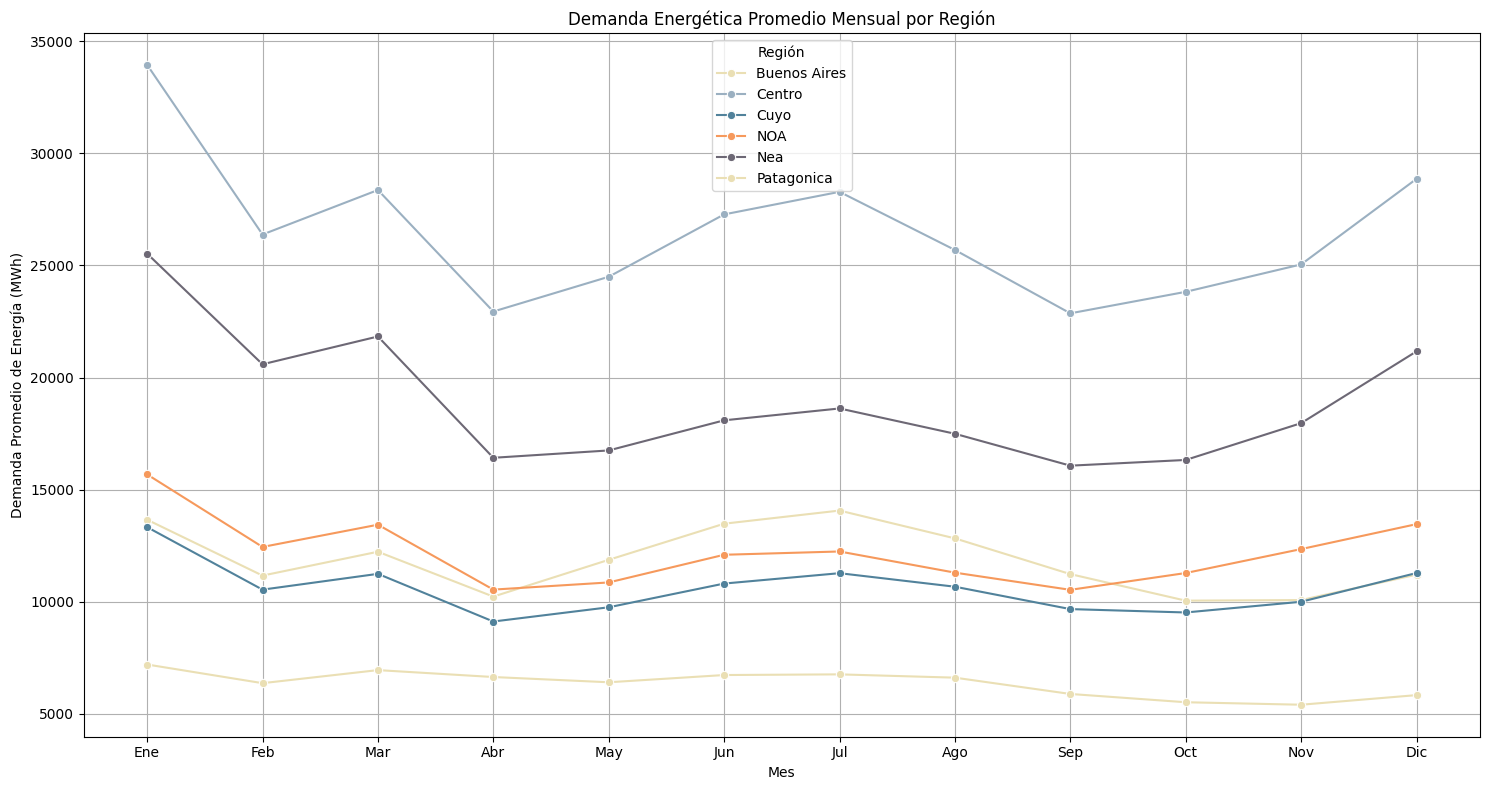

In [8]:
# Extraer el mes de la columna 'AÑO_MES' para el análisis mensual
df_Demanda['MES'] = pd.to_datetime(df_Demanda['AÑO_MES']).dt.month

# Agrupar los datos por región y mes para obtener la demanda promedio de energía
demanda_promedio_por_mes_y_region = df_Demanda.groupby(['REGION2', 'MES'])['DEMANDA [MWh]'].mean().reset_index()

# Crear el gráfico de líneas para cada región, mostrando la demanda promedio de energía por mes
plt.figure(figsize=(15, 8))
sns.lineplot(data=demanda_promedio_por_mes_y_region, x='MES', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones , marker="o")

plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('Demanda Energética Promedio Mensual por Región')
plt.xlabel('Mes')
plt.ylabel('Demanda Promedio de Energía (MWh)')
plt.legend(title='Región')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-9-92bf30675426>:7: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=demanda_por_año_y_region, x='AÑO', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones, marker="o")


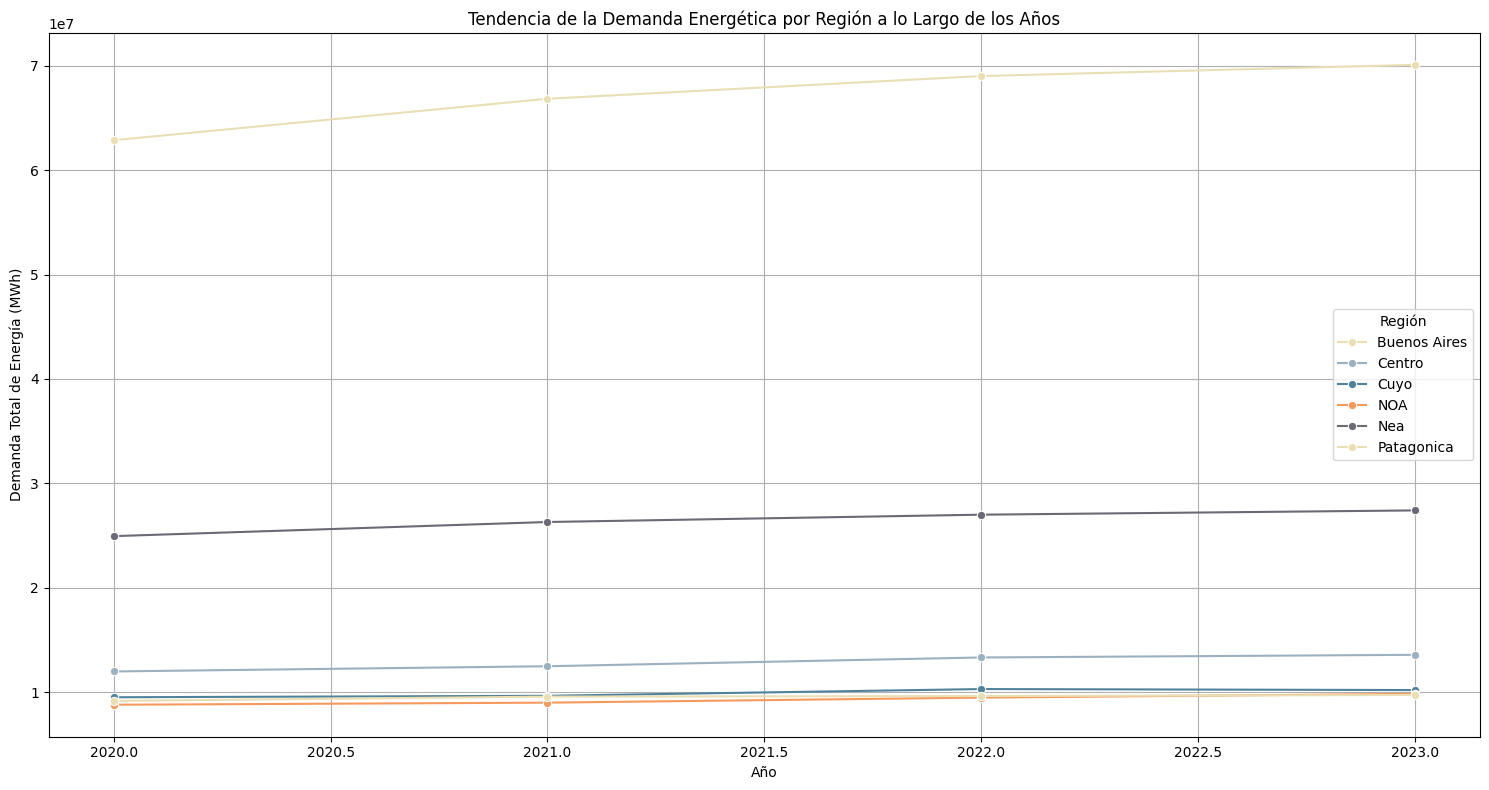

In [9]:
# Asumiendo que 'df' ya está cargado y contiene tus datos
# Agrupar los datos por año y región para obtener la demanda total o promedio de energía
demanda_por_año_y_region = df_Demanda.groupby(['REGION2', 'AÑO'])['DEMANDA [MWh]'].sum().reset_index()

# Crear el gráfico de líneas para mostrar la tendencia de la demanda de energía por año en cada región
plt.figure(figsize=(15, 8))
sns.lineplot(data=demanda_por_año_y_region, x='AÑO', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones, marker="o")

plt.title('Tendencia de la Demanda Energética por Región a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Demanda Total de Energía (MWh)')
plt.legend(title='Región')
plt.grid(True)
plt.tight_layout()
plt.show()

Es Buenos Aires quien demanda mayor cantidad de energía, representa casi el 50% de la demanda total mientras que un 23,1% representa a mas de 10 provincias(donde cada una de ellas demanda menos del 2,5% del total). Quien le sigue a Buenos Aires es Santa Fe con una demanda del 9,3% y tercero se ubica Córdoba con 7,5%

La región Patagónica posee una demanda de energía lineal que no sigue la tendencia de las demás regiones.

Se observa que existe una tendencia de mayor demanda en algunos meses donde se producen los picos. Son el Centro y el NEA quienes tienen mayor mayores diferencias entre los meses de mayor demanda.
Buenos Aires , el NEA  y el Centro son quienes muestran un alza en su demanda a lo largo del tiempo


Con el dataset del **clima(Temp.txt)** lo que se va a realizar es una transformacion de caracteristicas a todas sus variables. La variable fecha va a separarse en tres columnas(Año, Mes, Dia) mientras que las variables Tmax y Tmin que corresponden a las temperaturas maximas y minimas de las ubicaciones se creara un promedio entre ellas si la localidad se encuentra en la misma provincia con el fin de dejar para un dia del mes del año una temperatura maxcima y otra minima para cada una de las provincias. Y con la columna final Nombre se eliminara y se creara una nueva columna llamada Provincia. Esto se va a realizar con ayuda del diccionario **Provincias_Temp** que es el que provee de la informacion que relaciona a cada ubicacion con su provincia correspondiente.

Las lineas que encuentren nulos en sus columnas seran eliminadas y no seran parte del analisis.

Una vez arreglado el dataset se procedera a realizar mediciones individuales para evaluar las tendencias del mismo

In [29]:
# Convertir los datos procesados a un DataFrame de pandas
Temp_df = pd.DataFrame(processed_data, columns=['FECHA', 'TMAX', 'TMIN', 'NOMBRE'])

# Convertir las columnas TMAX y TMIN a numéricas, manejando valores no numéricos
Temp_df['TMAX'] = pd.to_numeric(Temp_df['TMAX'], errors='coerce')
Temp_df['TMIN'] = pd.to_numeric(Temp_df['TMIN'], errors='coerce')

#Modificacion del formato Fecha del dataframe de Temperatura
# Corregir las fechas inválidas añadiendo el cero faltante para los meses
Temp_df['FECHA'] = Temp_df['FECHA'].apply(lambda x: f"0{x}" if len(str(x)) == 7 else str(x))

# Intentar convertir nuevamente a formato de fecha
try:
    Temp_df['FECHA'] = pd.to_datetime(Temp_df['FECHA'], format='%d%m%Y')
except ValueError as e:
    print(f"Error al convertir: {e}")

#Creo un nuevo dataframe donde agrupo las localidades correspondientes a cada una de las provincias y creo una medida general para cada una de ellas
# Realizar nuevamente la fusión con el dataframe corregido
merged_df = Temp_df.merge(DF_prov_temp, left_on='NOMBRE', right_on='LOCALIDAD')

# Agrupar por fecha y provincia, calculando las temperaturas máximas y mínimas para cada grupo
TempProv_df = merged_df.groupby(['FECHA', 'PROVINCIA']).agg(TMAX_PROV=('TMAX', 'max'), TMIN_PROV=('TMIN', 'min')).reset_index()

# Extraer el año, el mes y el día en columnas separadas
TempProv_df['AÑO'] = TempProv_df['FECHA'].dt.year
TempProv_df['MES'] = TempProv_df['FECHA'].dt.month

# Eliminar la columna 'FECHA'
DF_TEMP = TempProv_df.drop('FECHA', axis=1)

# Reordenar las columnas según lo especificado
columnas_ordenadas = ['AÑO', 'MES', 'TMAX_PROV', 'TMIN_PROV', 'PROVINCIA']
DF_TEMP= DF_TEMP[columnas_ordenadas]
# Renombrar las columnas 'TMAX_PROV' y 'TMIN_PROV' a 'TMAX' y 'TMIN', respectivamente
DF_TEMP.rename(columns={'TMAX_PROV': 'TMAX', 'TMIN_PROV': 'TMIN'}, inplace=True)

# Agrupando por 'AÑO' y 'MES' y calculando el promedio de 'TMAX' y 'TMIN'
monthly_avg_temp = DF_TEMP.groupby(['AÑO', 'MES', 'PROVINCIA']).agg(
    TMAX=pd.NamedAgg(column='TMAX', aggfunc='mean'),
    TMIN=pd.NamedAgg(column='TMIN', aggfunc='mean')
).reset_index()


# Mostrar las primeras filas del dataframe resultante para confirmar
DF_TEMP.head()

,AÑO,MES,TMAX,TMIN,PROVINCIA
0,2022,12,4.9,-8.5,Antartida
1,2022,12,40.8,11.7,Buenos Aires
2,2022,12,41.8,21.0,Catamarca
3,2022,12,40.4,22.5,Chaco
4,2022,12,30.0,8.2,Chubut



**Dataset Final de Temperaturas**
Este dataset es creado a partir de los archivos Provincias_Temp.xlsx y Temp.txt el mismo contiene 9361 registros y la siguiente estructura:


*   FECHA: Representa la fecha de la observación. Es de tipo objeto (string).
*   TMAX: Corresponde a la temperatura máxima registrada para la fecha y representa una temperatura máxima media para cada provincia.
*  TMIN: Corresponde a la temperatura mínima registrada para la fecha y representa una temperatura mínima media para cada provincia.
* PROVINCIA: Representa la provincia correspondiente a cada una de las localidades. Es de tipo objeto (string) y todos los registros tienen una provincia asociada.

El fin de este dataset es poder complementar el análisis del dataset de demanda eléctrica con la información de la temperatura registrada por día y por provincia
Una característica de este dataset es que por cuestiones de donde se descarga la información posee solo registros que comprenden entre el 7 de diciembre de 2022 hasta el 31 de diciembre de 2023.

Al no tener en el dataset principal el dia, se procede a crear un promedio mensual de la temperatura maxima y minima asi poder luego unir ambos datasets.







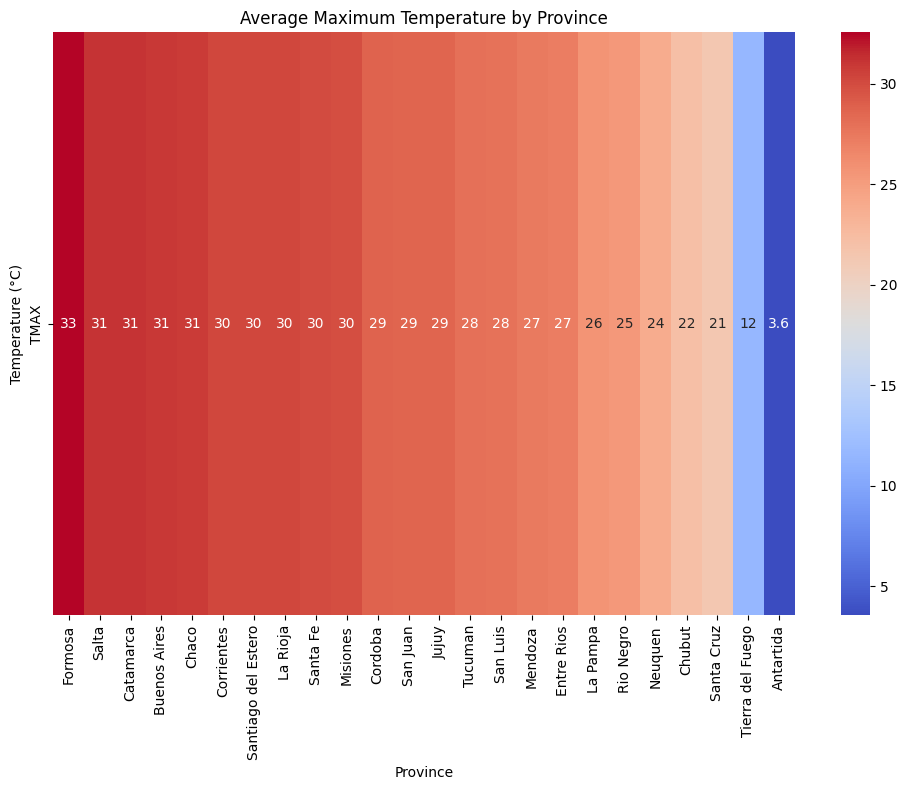

In [11]:
# Preparing the data: aggregating the maximum temperature by province
heatmap_data = DF_TEMP.groupby('PROVINCIA')['TMAX'].mean().reset_index()

# Sorting the data to have a consistent order in the heatmap
heatmap_data = heatmap_data.sort_values(by='TMAX', ascending=False)

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.set_index('PROVINCIA').T, cmap='coolwarm', annot=True)
plt.title('Average Maximum Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Temperature (°C)')
plt.tight_layout()  # Adjusts plot to fit the labels
plt.show()

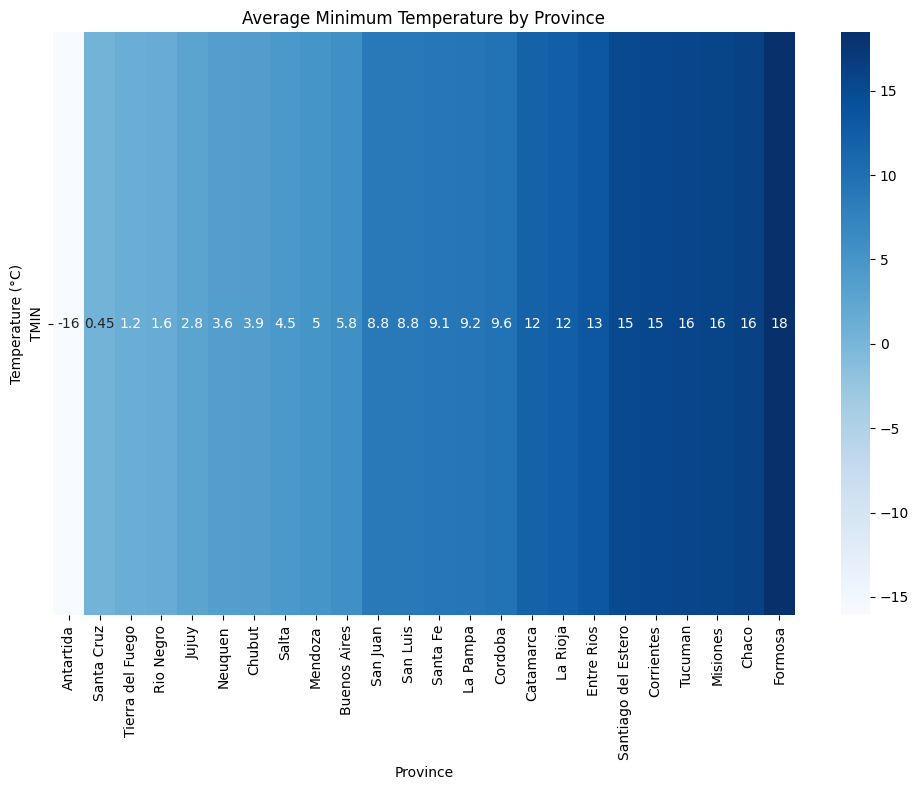

In [12]:
# Preparing the data: aggregating the minimum temperature by province
heatmap_data_min = DF_TEMP.groupby('PROVINCIA')['TMIN'].mean().sort_values().reset_index()

# Creating the heatmap for minimum temperatures using a blue color palette
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_min.set_index('PROVINCIA').T, cmap='Blues', annot=True)
plt.title('Average Minimum Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Temperature (°C)')
plt.tight_layout()  # Adjusts plot to fit the labels
plt.show()

Se puede ver que la provincia que posee los valores mas altos de temperatura es Formosa mientras que la provincia que registra los valores mas frios es Santa Cruz descartando los valores de la Antartida

Para pasar al proximo paso voy a unir estos dos datasets para crear uno solo llamado DF_Final. Este dataset tendrá los datos desde Diciembre de 2022 hasta Diciembre de 2023.

In [13]:
# Estandarizar los nombres de las provincias para que coincidan entre los datasets
DF_TEMP['PROVINCIA'] = DF_TEMP['PROVINCIA'].str.upper()
DF_TEMP = DF_TEMP [~DF_TEMP ['PROVINCIA'].isin(['Tierra del fuego', 'Antartida'])]
# Identifica la fila donde la columna 'provincia' es 'SANTIAGO DEL ESTERO'
# y cambia ese valor a 'SGO.DEL ESTERO'
DF_TEMP.loc[DF_TEMP['PROVINCIA'] == 'SANTIAGO DEL ESTERO', 'PROVINCIA'] = 'SGO.DEL ESTERO'

In [15]:
# Realizar el inner join
DF_Final = pd.merge(df_Demanda, DF_TEMP, on=['AÑO', 'MES', 'PROVINCIA'], how='inner')

# Eliminar duplicados basándose en las columnas Año, Mes, Provincia y Agente Descripcion
DF_Final = DF_Final.drop_duplicates(subset=['AÑO', 'MES', 'PROVINCIA','AGENTE DESCRIPCION'])

# Mostrar las primeras filas del resultado corregido para verificar la unión
DF_Final.head()

,AÑO,MES,AGENTE DESCRIPCION,REGION,PROVINCIA,CATEGORIA AREA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh],REGION2,AÑO_MES,TMAX,TMIN
0,2022,12,AEROP ARG 2000 - Aeroparque,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1581.991,Buenos Aires,2022-12,40.8,11.7
25,2022,12,ABRIL CLUB DE CAMPO,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1614.313,Buenos Aires,2022-12,40.8,11.7
50,2022,12,ASOC.COOP.ARG. - Quequén,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,221.968,Buenos Aires,2022-12,40.8,11.7
75,2022,12,ACERBRAG-Bragado,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,23670.775,Buenos Aires,2022-12,40.8,11.7
100,2022,12,ACINDAR PTA. TABLADA,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2070.958,Buenos Aires,2022-12,40.8,11.7


# **Prueba de Modelos**

In [16]:
DF_Finalcopia = DF_Final.copy()

**Regresion Múltiple**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Actualizar la lista de variables independientes con el nombre correcto
variables_independientes = ['AÑO', 'MES', 'AGENTE DESCRIPCION', 'PROVINCIA', 'CATEGORIA AREA', 'TARIFA', 'TMAX', 'TMIN']

# Preparar nuevamente los datos con los nombres de columnas correctos
X = DF_Final[variables_independientes]
y = DF_Final['DEMANDA [MWh]']

# Actualizar la lista de características categóricas con el nombre correcto
categorical_features = ['AGENTE DESCRIPCION', 'PROVINCIA', 'CATEGORIA AREA', 'TARIFA']


# Dividir nuevamente los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir explícitamente las características numéricas
numeric_features = ['AÑO', 'MES', 'TMAX', 'TMIN']

# Reconstruir el preprocesador y el pipeline del modelo con las definiciones correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Entrenar el modelo con los datos correctos
model_pipeline.fit(X_train, y_train)

# Predecir y evaluar el modelo con los datos de prueba
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(18959.522613591314, 0.5281698672184808)

Resultados de la Regresion Múltiple que
ha sido entrenado y evaluado:
Raíz del Error Cuadrático Medio (RMSE): 18,959.52
Coeficiente de Determinación (R^2): 0.528
Estos resultados indican que el modelo tiene un nivel moderado de precisión en la predicción de la demanda. El R^2 de 0.528 sugiere que aproximadamente el 52,8% de la variabilidad en la demanda es explicada por el modelo. Aunque no es perfecto, proporciona una base razonable para entender cómo las variables seleccionadas afectan la demanda.

**Random Forest**: método de ensamble que utiliza múltiples árboles de decisión para mejorar la robustez y precisión del modelo.

In [169]:
from sklearn.ensemble import RandomForestRegressor

# Crear el pipeline con el preprocesamiento y el modelo de Random Forest
rf_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Entrenar el modelo de Random Forest con los datos de entrenamiento
rf_model_pipeline.fit(X_train, y_train)

# Predecir y evaluar el modelo de Random Forest con los datos de prueba
y_pred_rf = rf_model_pipeline.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(19358.99081071805, 0.508077933402842)

El modelo de Random Forest ha sido entrenado y evaluado, obteniendo los siguientes resultados:

Raíz del Error Cuadrático Medio (RMSE): 19,149.30
Coeficiente de Determinación (R^2): 0.508
Comparando estos resultados con el modelo de regresión lineal, el Random Forest tiene un rendimiento similar en términos de R^2 y RMSE. Esto sugiere que, para este conjunto de datos específico, ambos modelos tienen una capacidad comparable para explicar la variabilidad de la demanda.

**Gradient Boosting**: esta tecnica construye arboles de decicion de manera secuencial, donde cada árbol intenta corregir los errores del anterior.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el pipeline con el preprocesamiento y el modelo de Gradient Boosting
gb_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

# Entrenar el modelo de Gradient Boosting con los datos de entrenamiento
gb_model_pipeline.fit(X_train, y_train)

# Predecir y evaluar el modelo de Gradient Boosting con los datos de prueba
y_pred_gb = gb_model_pipeline.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

rmse_gb, r2_gb


(17523.054586346796, 0.5969578147427506)

El modelo de Gradient Boosting ha sido entrenado y evaluado, obteniendo los siguientes resultados:

Raíz del Error Cuadrático Medio (RMSE): 17,523.04
Coeficiente de Determinación (R^2): 0.596
Estos resultados indican una mejora en comparación con los modelos anteriores de regresión lineal y Random Forest. El RMSE es menor, lo que significa que el modelo tiene un error promedio menor en las predicciones, y el R^2 es mayor, indicando que el modelo puede explicar aproximadamente el 60% de la variabilidad en la demanda.

**KNN**: método de aprendizaje basado en instancias que utiliza los k vecinos más cercanos para predecir el valor de una nueva observación.

In [172]:
from sklearn.neighbors import KNeighborsRegressor

# Crear el pipeline con el preprocesamiento y el modelo k-NN
knn_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', KNeighborsRegressor(n_neighbors=5))])

# Entrenar el modelo k-NN con los datos de entrenamiento
knn_model_pipeline.fit(X_train, y_train)

# Predecir y evaluar el modelo k-NN con los datos de prueba
y_pred_knn = knn_model_pipeline.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

rmse_knn, r2_knn


(24080.63664163447, 0.2388560383913585)

El modelo k-Nearest Neighbors (k-NN) ha sido entrenado y evaluado, obteniendo los siguientes resultados:

Raíz del Error Cuadrático Medio (RMSE): 24.080,6366
Coeficiente de Determinación (R^2): 0.2388
Estos resultados muestran que el modelo k-NN tiene un rendimiento significativamente inferior en este conjunto de datos en comparación con los modelos de regresión lineal, Random Forest y Gradient Boosting. El RMSE es bastante más alto, indicando un mayor error en las predicciones, y el R^2 es mucho más bajo, sugiriendo que el modelo solo puede explicar aproximadamente el 24% de la variabilidad en la demanda.

Basado en estos resultados, el k-NN no parece ser el modelo más adecuado para este problema específico de predicción de demanda con el conjunto de datos actual.

**Validacion Cruzada a travez de K-Fold**:

En este método, el conjunto de datos se divide en k particiones (o "folds") de tamaño aproximadamente igual. Luego, el modelo se entrena k veces, cada vez utilizando k-1 folds para el entrenamiento y el fold restante para la prueba. Este proceso asegura que cada parte del conjunto de datos se utiliza tanto para el entrenamiento como para la prueba, y proporciona una evaluación más completa del rendimiento del modelo.

Vamos a aplicar la validación cruzada k-fold al modelo que mejor rendimiento tuvo, que en este caso fue el Gradient Boosting. Usaremos, por ejemplo, un k-fold de 5 iteraciones para evaluar el rendimiento. Esto nos dará una idea más clara de qué tan bien el modelo es capaz de generalizar a nuevos datos.

In [21]:
from sklearn.model_selection import cross_val_score

# Configuramos la validación cruzada k-fold con k=5
k = 5

# Creamos el pipeline completo para el modelo de Gradient Boosting
gb_model_full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

# Aplicamos la validación cruzada k-fold para evaluar el modelo
cv_scores = cross_val_score(gb_model_full_pipeline, X, y, cv=k, scoring='r2')

cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

cv_scores_mean, cv_scores_std


(0.7827359988010947, 0.20452168372681415)

Los resultados de la validación cruzada k-fold para el modelo de Gradient Boosting son los siguientes:

Alta media de R^2 (0.783): El modelo, en promedio, puede explicar aproximadamente el 78.3% de la variabilidad en la demanda energética a través de los distintos subconjuntos de datos utilizados en la validación cruzada. Esto indica un buen ajuste del modelo.

Desviación estándar moderada (0.205): La variabilidad en el rendimiento del modelo entre los diferentes folds de la validación cruzada es moderada. Esto sugiere que el modelo tiene una buena estabilidad y es capaz de adaptarse a diferentes segmentos de los datos sin mostrar una variabilidad excesiva en su rendimiento.

Con base en estos resultados, se puede decir que el modelo de Gradient Boosting es una buena elección para la predicción de la demanda energética, ya que proporciona una combinación de alta precisión y estabilidad en las predicciones a través de diferentes conjuntos de datos.

**La importancia de las características del modelo de Gradient Boosting**

In [22]:
# Obtener la importancia de las características del modelo de Gradient Boosting
feature_importances = gb_model_pipeline.named_steps['regressor'].feature_importances_

# Obtener los nombres de las características después del preprocesamiento
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, feature_names])

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df.head()

,Feature,Importance
0,AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.,0.313221
1,TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH,0.157430
2,AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR,0.076339
3,TARIFA_Alumbrado Publico,0.066960
4,CATEGORIA AREA_Cordoba,0.058135


Los resultados son los siguientes:

AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN. (31.32%): Esta característica es la más importante y tiene una gran influencia en la predicción de la demanda energética. Significa que el agente "ALUAR SA AUTOGENERADOR REN." tiene un impacto significativo en la variabilidad de la demanda energética.

TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH (15.74%): Esta tarifa específica para usuarios no residenciales con un consumo menor a 300 kWh también tiene una influencia considerable en la predicción de la demanda.

AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR (7.63%): El agente "EDESUR DISTRIBUIDOR" es otra variable importante, indicando que este distribuidor particular juega un papel significativo en la demanda energética.

TARIFA_Alumbrado Publico (6.70%): La tarifa aplicada al alumbrado público también impacta en la demanda, lo que indica que las políticas o costos asociados con esta tarifa pueden afectar la demanda total de energía.

CATEGORIA AREA_Cordoba (5.81%): La región de Córdoba, en términos de categoría de área, también influye en la demanda energética, reflejando diferencias regionales en el consumo de energía.

Interpretación
Estos resultados indican que tanto las características específicas de los agentes (como ALUAR y EDESUR) como las categorías de tarifa son determinantes significativos en la predicción de la demanda energética. Además, la influencia de factores regionales, como ser de Córdoba, muestra que la demanda puede variar significativamente por área geográfica.

Acciones a considerar
Análisis detallado: Realizar análisis más detallados en las categorías y agentes más influyentes para entender sus patrones de demanda y cómo estos pueden ser administrados o previstos.
Políticas energéticas: Considerar estos hallazgos en la formulación de políticas energéticas, en la planificación de la capacidad y en las estrategias de gestión de la demanda.
Estudios regionales: Dado el impacto significativo de ciertas áreas, como Córdoba, considerar estudios regionales para entender mejor las necesidades energéticas locales y cómo estas se integran en el panorama nacional.

Modelo ARIMA

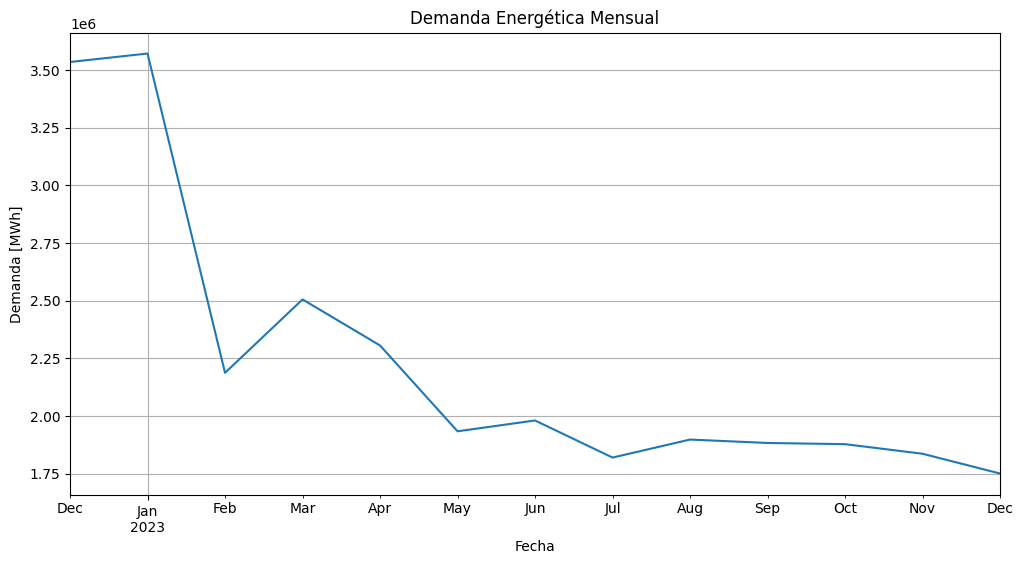

Estadístico ADF: -3.525171703333984
Valor p (p-value): 0.007363680712751398
Valores Críticos:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625


In [176]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Suponiendo que ya tenemos las columnas 'AÑO' y 'MES' en DF_Final
# Combinamos 'AÑO' y 'MES' para formar una columna de 'FECHA' en formato datetime
DF_Final['FECHA'] = pd.to_datetime(DF_Final['AÑO'].astype(str) + '-' + DF_Final['MES'].astype(str))

# Agrupamos los datos por la nueva columna 'FECHA' para obtener la demanda total mensual
df_temporal = DF_Final.groupby('FECHA')['DEMANDA [MWh]'].sum().sort_index()

# Visualización de la serie temporal de demanda energética
plt.figure(figsize=(12, 6))
df_temporal.plot(title='Demanda Energética Mensual')
plt.ylabel('Demanda [MWh]')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

# Procederemos a realizar la prueba de estacionariedad en la serie
adf_result = adfuller(df_temporal)
print(f'Estadístico ADF: {adf_result[0]}')
print(f'Valor p (p-value): {adf_result[1]}')
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')
